<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/Corrfiltertracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de suivi par filtre de correlation

In [1]:
import cv2  
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Lecture de deux images tests et affichage.

In [2]:
image_name = 'in000216.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000216.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000219.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000222.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000225.jpg

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000216.jpg
To: /content/in000216.jpg
100% 178k/178k [00:00<00:00, 2.81MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000219.jpg
To: /content/in000219.jpg
100% 178k/178k [00:00<00:00, 5.72MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000222.jpg
To: /content/in000222.jpg
100% 178k/178k [00:00<00:00, 5.57MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000225.jpg
To: /content/in000225.jpg
100% 177k/177k [00:00<00:00, 5.70MB/s]


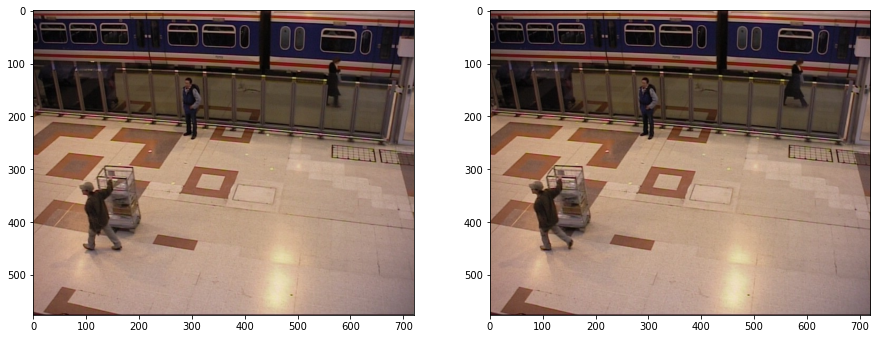

In [3]:
image1 = cv2.imread('in000216.jpg')
image2 = cv2.imread('in000219.jpg') 
image1 = image1[:,:,::-1] 
image2 = image2[:,:,::-1] 
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1)
axarr[1].imshow(image2)
plt.show()

Définition de la région d'intérêt

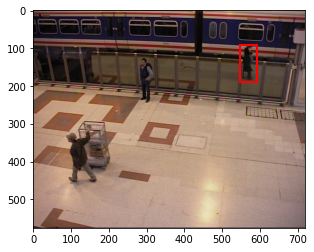

In [4]:
# Pour suivre une des trois personnes
#bbox = (279, 120, 36, 120)
#bbox = (83, 300, 70, 160)
bbox = (547, 90, 45, 100)
fig,ax = plt.subplots(1)
ax.imshow(image1)
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Initialisation de la méthode de suivi KCF.

In [5]:
tracker = cv2.TrackerKCF_create()
ok = tracker.init(image1, bbox)  #ok permet de vérifier si tout se passe bien. Ici, je ne fais pas de vérification...

Suivi dans l'autre trame et affichage du résultat.

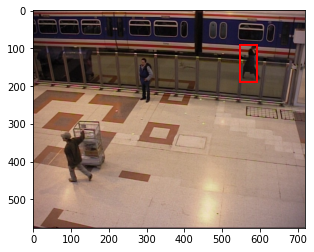

In [6]:
ok, bbox = tracker.update(image2)

fig,ax = plt.subplots(1)
ax.imshow(image2)
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Suivi sur une autre trame.

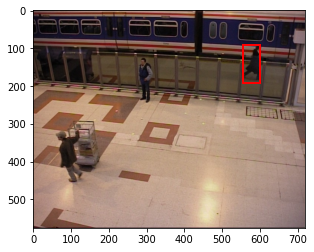

In [7]:
#Lecture de la trame
image3 = cv2.imread('in000222.jpg') 
image3 = image3[:,:,::-1] 

#Suivi et affichage
ok, bbox = tracker.update(image3)
fig,ax = plt.subplots(1)
ax.imshow(image3)
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

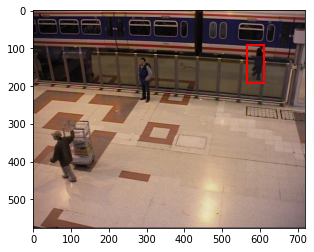

In [8]:
#Lecture de la trame
image4 = cv2.imread('in000225.jpg') #Essayer 235, 227
image4 = image4[:,:,::-1] 

#Suivi et affichage
ok, bbox = tracker.update(image4)
fig,ax = plt.subplots(1)
ax.imshow(image4)
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Le déplacement de l'objet ne doit pas être trop grand.